In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [9]:
series = read_csv('sales-of-shampoo-over-a-three-ye.csv',delimiter=";" ,header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.head()

Month
1901-01-01    266
1901-02-01    145
1901-03-01    183
1901-04-01    119
1901-05-01    180
Name: Sales of shampoo over a three year period, dtype: int64

Month
1901-01-01    266
1901-02-01    145
1901-03-01    183
1901-04-01    119
1901-05-01    180
Name: Sales of shampoo over a three year period, dtype: int64


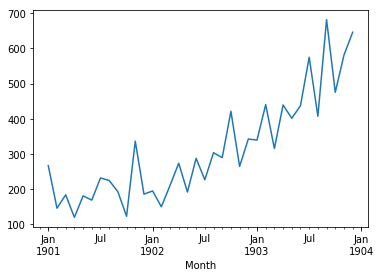

In [10]:
print(series.head())
series.plot()
pyplot.show()

In [11]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\ANANYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ANANYA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ANANYA\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ANANYA\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this w

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.156
Method:                                                css-mle   S.D. of innovations             64.212
Date:                                         Mon, 04 Mar 2019   AIC                            406.313
Time:                                                 18:23:18   BIC                            417.200
Sample:                                             02-01-1901   HQIC                           410.071
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [12]:
X = series.values
X

array([266, 145, 183, 119, 180, 168, 231, 224, 192, 122, 336, 185, 194,
       149, 210, 273, 191, 287, 226, 303, 289, 421, 264, 342, 339, 440,
       315, 439, 401, 437, 575, 407, 682, 475, 581, 646], dtype=int64)

In [13]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\Users\ANANYA\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ANANYA\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\ANANYA\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

predicted=348.775725, expected=342.000000
predicted=306.211184, expected=339.000000
predicted=386.568036, expected=440.000000
predicted=347.081010, expected=315.000000
predicted=386.139950, expected=439.000000
predicted=355.240198, expected=401.000000
predicted=445.642331, expected=437.000000
predicted=394.158484, expected=575.000000
predicted=433.636767, expected=407.000000
predicted=507.831354, expected=682.000000
predicted=434.806837, expected=475.000000
predicted=652.630955, expected=581.000000
predicted=546.383223, expected=646.000000
Test MSE: 6952.761


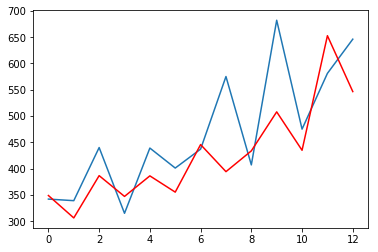

In [14]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()